In [2]:
from google.colab import files
uploades=files.upload()

Saving dogs.zip to dogs.zip


In [3]:
!unzip "dogs.zip"

Archive:  dogs.zip
   creating: dogs/n02085620-Chihuahua/
  inflating: dogs/n02085620-Chihuahua/n02085620_10074.jpg  
  inflating: dogs/n02085620-Chihuahua/n02085620_10131.jpg  
  inflating: dogs/n02085620-Chihuahua/n02085620_10621.jpg  
  inflating: dogs/n02085620-Chihuahua/n02085620_1073.jpg  
  inflating: dogs/n02085620-Chihuahua/n02085620_10976.jpg  
  inflating: dogs/n02085620-Chihuahua/n02085620_11140.jpg  
  inflating: dogs/n02085620-Chihuahua/n02085620_11238.jpg  
  inflating: dogs/n02085620-Chihuahua/n02085620_11258.jpg  
  inflating: dogs/n02085620-Chihuahua/n02085620_11337.jpg  
  inflating: dogs/n02085620-Chihuahua/n02085620_11477.jpg  
  inflating: dogs/n02085620-Chihuahua/n02085620_1152.jpg  
  inflating: dogs/n02085620-Chihuahua/n02085620_11696.jpg  
  inflating: dogs/n02085620-Chihuahua/n02085620_11818.jpg  
  inflating: dogs/n02085620-Chihuahua/n02085620_11948.jpg  
  inflating: dogs/n02085620-Chihuahua/n02085620_1205.jpg  
  inflating: dogs/n02085620-Chihuahua/n020856

In [4]:
!ls

dogs  dogs.zip	sample_data


In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [9]:
train_generator = train_datagen.flow_from_directory(
        'dogs/',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        subset='training',
        classes=['n02085782-Japanese_spaniel','n02085936-Maltese_dog','n02086240-Shih-Tzu',
                 'n02098105-soft-coated_wheaten_terrier','n02099429-curly-coated_retriever',
                 'n02099601-golden_retriever','n02099712-Labrador_retriever','n02107142-Doberman',
                 'n02110958-pug','n02112018-Pomeranian','n02113712-miniature_poodle'])

Found 522 images belonging to 11 classes.


In [11]:
validation_generator = train_datagen.flow_from_directory(
        'dogs/',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        subset='validation',
        classes=['n02085782-Japanese_spaniel','n02085936-Maltese_dog','n02086240-Shih-Tzu',
                 'n02098105-soft-coated_wheaten_terrier','n02099429-curly-coated_retriever',
                 'n02099601-golden_retriever','n02099712-Labrador_retriever','n02107142-Doberman',
                 'n02110958-pug','n02112018-Pomeranian','n02113712-miniature_poodle'])

Found 129 images belonging to 11 classes.


In [12]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(11, activation='softmax')])

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // train_generator.batch_size,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples // validation_generator.batch_size)

Epoch 1/10
16/16 [==============================] - 29s 2s/step - loss: 1.4660 - accuracy: 0.3122 - val_loss: 1.1531 - val_accuracy: 0.2891
Epoch 2/10
16/16 [==============================] - 27s 2s/step - loss: 1.1143 - accuracy: 0.3429 - val_loss: 1.1135 - val_accuracy: 0.3906
Epoch 3/10
16/16 [==============================] - 28s 2s/step - loss: 1.0643 - accuracy: 0.4204 - val_loss: 1.0494 - val_accuracy: 0.5156
Epoch 4/10
16/16 [==============================] - 27s 2s/step - loss: 0.9429 - accuracy: 0.5510 - val_loss: 0.9246 - val_accuracy: 0.5859
Epoch 5/10
16/16 [==============================] - 28s 2s/step - loss: 0.8691 - accuracy: 0.6286 - val_loss: 0.8837 - val_accuracy: 0.6172
Epoch 6/10
16/16 [==============================] - 39s 2s/step - loss: 0.7534 - accuracy: 0.6735 - val_loss: 0.9719 - val_accuracy: 0.5859
Epoch 7/10
16/16 [==============================] - 28s 2s/step - loss: 0.7105 - accuracy: 0.6837 - val_loss: 0.8518 - val_accuracy: 0.6016
Epoch 8/10
16/16 [==

In [16]:
model.save('trained_model_dogs.h5')

In [17]:
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

# Load and preprocess the image using OpenCV
def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (150, 150))
    img = img.astype("float") / 255.0
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

In [18]:
# Function to display image using OpenCV
def display_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

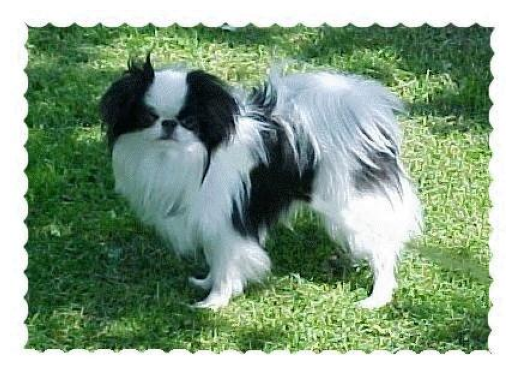

1/1 [==============================] - 0s 241ms/step


In [20]:
# Testing the model with a sample image
sample_image_path = 'dogs/n02085782-Japanese_spaniel/n02085782_2.jpg'
display_image(sample_image_path)
sample_image = load_and_preprocess_image(sample_image_path)
prediction = model.predict(sample_image)
predicted_class=np.argmax(prediction, axis=1)

In [21]:
class_indices={v:k for k,v in train_generator.class_indices.items()}
predicted_class_name= class_indices[predicted_class[0]]

In [22]:
print(f"predicted breed: {predicted_class_name}")

predicted breed: n02085782-Japanese_spaniel


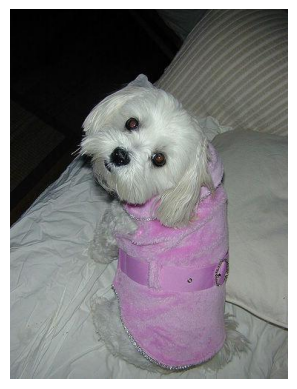

1/1 [==============================] - 0s 66ms/step


In [24]:
# Testing the model with a sample image
sample_image_path = 'dogs/n02085936-Maltese_dog/n02085936_4070.jpg'
display_image(sample_image_path)
sample_image = load_and_preprocess_image(sample_image_path)
prediction = model.predict(sample_image)
predicted_class=np.argmax(prediction, axis=1)

In [25]:
class_indices={v:k for k,v in train_generator.class_indices.items()}
predicted_class_name= class_indices[predicted_class[0]]

In [26]:
print(f"predicted breed: {predicted_class_name}")

predicted breed: n02085936-Maltese_dog


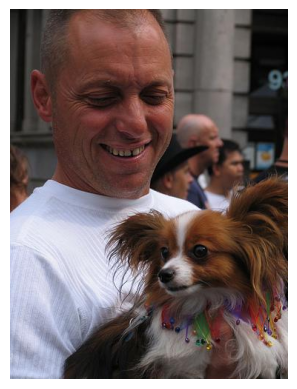

1/1 [==============================] - 0s 36ms/step


In [27]:
# Testing the model with a sample image
sample_image_path = 'dogs/n02086910-papillon/n02086910_1409.jpg'
display_image(sample_image_path)
sample_image = load_and_preprocess_image(sample_image_path)
prediction = model.predict(sample_image)
predicted_class=np.argmax(prediction, axis=1)

In [28]:
loss,accuracy=model.evaluate(validation_generator)
print(f'validation loss:{loss}')
print(f'validation accuracy: {accuracy}')

5/5 [==============================] - 3s 537ms/step - loss: 1.0462 - accuracy: 0.5659
validation loss:1.0462459325790405
validation accuracy: 0.565891444683075
